In [ ]:
#Intro to Regression with Neural Networks in tf

import tensorflow as tf
print(tf.__version__)

2.7.0


### Creating data to view and fit

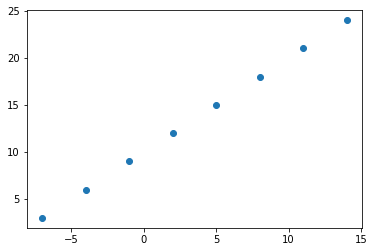

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

The relationship we trying to get the network to learn is `y= X +10`



### Input and Output Shapes

(3,)


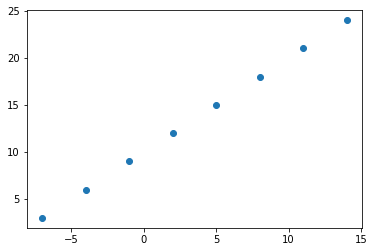

In [ ]:
# Example input and output shapes of a regresson model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

print(house_info.shape)

import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

### Steps in modelling with TensorFlow

1. Creating a model - define input and output layers, as well as the hidden layers of a deep learning model
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimiser (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [ ]:
#Optionally, the first layer can receive an `input_shape` argument:
model = tf.kera.Sequential()
model.add(tf.keras.layers.Dense(8,input_shape=(16,)))
#Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape = (16,)))

#An alternative method to write the code below. 
model= tf.keras.Sequential() # Sequential is initiated first.
model.add.add(tf.keras.layers.Dense(1)) # Then layers is added in sequential state

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])


#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

In [ ]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

### Improving Our Model

By altering the steps took to create the model

1. **Creating a model** - add more layers, increase the number of hidden units (neurons) within each hidden layers or changing activation function of each layer.

2. **Compiling a model** - Changing the optimisation function or the **learning rate** of the optimisation function.

3. **Fitting a modell** - Fit a model for more **epochs** for more orunds of training the datase or fitting more data in if available.

Smaller Model

In [ ]:
#Rebuilding the existing model
#1. Rebuild the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

#. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=['mae'])

#3. Fit the model (running it with higher epochs)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [ ]:
model.predict([17.0])

array([[29.256401]], dtype=float32)

Making Changes to the smaller model

In [ ]:
###Sample Larger Model
# 1. Creating the improved model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50,activation ="relu"),
                             tf.keras.layers.Dense(1)

])


#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= ['mae'])

#3. Fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

model.predict([17.0])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 1s 632ms/step - loss: 12.5811 - mae: 12.5811
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 12.0147 - mae: 12.0147
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.4436 - mae: 11.4436
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8674 - mae: 10.8674
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3032 - mae: 10.3032
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.7481 - mae: 9.7481
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 9.1838 - mae: 9.1838
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.6078 - mae: 8.6078
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 8.0169 - mae: 8.0169
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4127 - mae: 7.4127
Epoch 11/100
1/1 [==============================] - 0s 11ms/step 

array([[27.462837]], dtype=float32)

The model above while having a lower loss and mae, the prediction wasn't right. This is a sign of overfitting. 

Common ways to improve models:

1. Adding hidden layers
2. Increase the number of hidden units
3. Change the activation functions
4. CHange the optimisation function
5. Change the learning rate (one of the most important factor to tweak
6. Fittine on more data
7. Fitting for longer runs (epochs)

### Evaluting Models

Typical workflow of builind neural network
```
Build model -> fit it -> evaluate it -> tweak model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it
```

It is good to visualise the following:
- The data - determine the type of data and how it looks like
- The model - what does the model looks like?
- The training of a model - how does a model perform while it learns?
- The predictions of the model - how does the prediction compare to ground truth (original labels)? 

In [ ]:
tf.random.set_seed(42)

# Creating a bigger dataset
X= tf.range(-100,100,4) # range of -100 to 96 in steps of 4
X
#Creating labels for the dataset 
y= X+10

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In machine learning, we will often need three different sets of data

1. Training Set - model learns from this data 70-80% of the data available
2. Validation set - model gets tuned on this data, which is 10-15% of total data
3. Test Set, model gets evaulated on this data to test what it has learned, 10-15% of the data.

(40, 40, 10, 10)

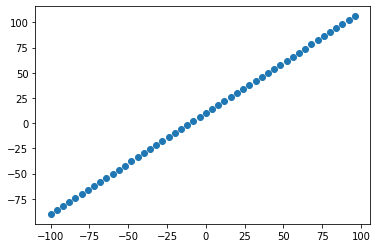

In [ ]:
#1. Visualise the Data
import matplotlib.pyplot as plt

print(plt.scatter(X,y))

#2. Splitting dataset into training and test set


X_train = X[:40] 
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)



###Visualising Data

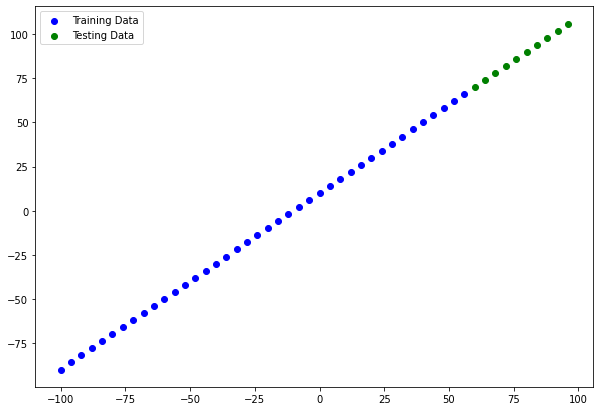

In [ ]:
#Setting up plot size
plt.figure(figsize=(10,7))
#Plot training data in blue
plt.scatter(X_train,y_train, c='b', label= "Training Data")
#Plot test data in green
plt.scatter(X_test, y_test, c='g', label="Testing Data")
#Show a legeng
plt.legend()
 


In [ ]:
#1. Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), #it is determined by the number of variable in each index
                             tf.keras.layers.Dense(1, name= "output_layer")
], name = "Model_One")
#2. Compile the model by defining the neural layers
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=['mae']
              )

#3. Fit the data to train the model
# model.fit(X_train, y_train, epochs=100)

In [ ]:
model.summary()

model.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100, verbose=0)

Model: "Model_One"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - Total number of parameters in the models
* Trainable parameters - these are teh parameters (patterns) the model can update as it trains.
* Non-trainable params - Parameters aren't updated during training (this is from patterns or parameters from other models during **transfer learning**.

Model: "Model_One"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


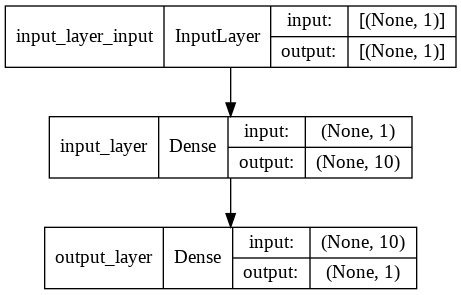

In [ ]:
 # Get summary of our model
 model.summary()


from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

#### Evaluating Prediction Using Visual

-Plot them against ground truth labels



In [ ]:
y_pred = model_1.predict(X_test)
y_pred

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

Write a f(x) for repeat use

In [ ]:
#plotting function

def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data= X_test,
                    test_labels= y_test,
                    predictions = y_pred):
  """
  Plot training, test data and compare with prediction
  """

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  #Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Test Data")
  #Plot predicted data in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  #Show legend
  plt.legend();

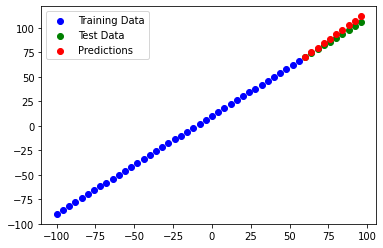

In [ ]:
plot_prediction()

Evaluating model's prediction with regression evalution metrics
- Types of evlauation is dependent on the model created. There are other types of model to evaluate model's performance. 

For regression, there are two main metrics
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE -mean square error, "square the average errors"

  

In [ ]:
# Evaluate on test dataset using MAE
model.evaluate(X_test)

#calculating mean absolute error (tf.keras.losses.mean_absolute_error(y_true,y_pred))
mae = tf.keras.losses.mean_absolute_error(y_true=y_test,y_pred= tf.squeeze(y_pred))
mae.numpy()


1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - mae: 0.0000e+00


3.1969407

In [ ]:
# Evaluate test dataset using MSE

mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred= tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
#Make functions to use MAE or MSE
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred));

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred));




### Running experiments to improve the models

- Tweak and Evaluate

1. Get more data - more examples for model to train on.
2. Make the model larger - using a more complex model (e.g. more layers or more hidden units in each layer).
3. Train for longer - give the model more chance to find patterns.

Model Design Planning
1. `Model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `Model_2` - 2 layers, trainded for 100 epochs
3. `Model_3` - 2 Layers, trained for 500 epochs

#### Building Model 1

1 Layer + 100 Epochs

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt



# Creating a bigger dataset
X= tf.range(-100,100,4) # range of -100 to 96 in steps of 4

#Creating labels for the dataset 
y= X+10

#Splitting dataset into training and test set
X_train = X[:40] 
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)



(40, 40, 10, 10)

In [ ]:
#Set random Seed
tf.random.set_seed(42)

#1. Create the model
model_1 = tf.keras.Sequential([
                                tf.keras.layers.Dense(1)
])

#2. Complie the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=['mae']
              )

#3 Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100)

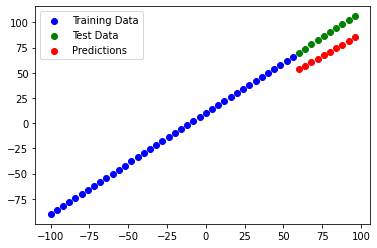

In [ ]:
#Make and plot predictions for model_1
y_preds_1= model_1.predict(X_test)

plot_prediction(predictions= y_preds_1)

In [ ]:
#Calculate model_1 evaluation metrics
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

#### Buildng `Model 2`
* 2 dense layers, trainded for 100 epochs

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1. Create the model
model_2 = tf.keras.Sequential([
                                tf.keras.layers.Dense(10),
                                tf.keras.layers.Dense(1)
])

#2. Complie the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=['mse']
              )

#3 Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100)

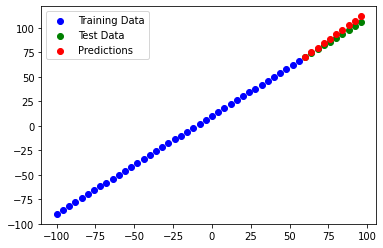

In [ ]:
#Prediction for model_2
y_preds_2 = model_2.predict(X_test)
plot_prediction(predictions=y_preds_2)

In [ ]:
#Calculate model_2 evaluation metrics
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

#### Building Model 3

- 2 layers, trained for 500 **epochs**

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1. Create the model
model_3 = tf.keras.Sequential([
                                tf.keras.layers.Dense(10),
                                tf.keras.layers.Dense(1)
])

#2. Complie the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=['mae']
              )

#3 Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 8ms/

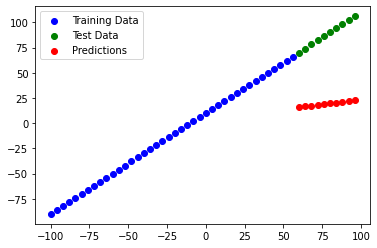

In [ ]:
#Prediction for model_3
y_preds_3 = model_3.predict(X_test)
plot_prediction(predictions=y_preds_3)

In [ ]:
#Calculate model_3 evaluation metrics
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

Comparing the results of experiments

**Note** Always start with small experiments before moving to bigger scale


In [ ]:
# Comparing results using a dataframe

import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(),mse_2.numpy()],
                 ['model_3', mae_3.numpy(),mse_3.numpy()]
                 ]

all_results =  pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results 

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


## Tracking your Expriments

Tools to use for tracking:
- TensorBoard - a component of TensorFlow library to track modelling experiments
- Weights & Biases - a tool to tracking all of kinds of ML experiments

## Saving and Loading Models

- Models saved can be used outside of Colab

THere are two main formats to save in 
1. SavedModel Format
2. HDF5 format

In [ ]:
# Save model using the SaveModel format
model_2.save("model_savemodelformat")

INFO:tensorflow:Assets written to: model_savemodelformat/assets


In [ ]:
#Save model using the HDF5 format for usage outside of tensorflow
model_2.save('model_hdf5.h5')

In [ ]:
#Loading in a saved model
loadsavedmodel = tf.keras.models.load_model("/content/model_savemodelformat")
loadsavedmodel.summary()

#Compare model_2 predictions with savedmodel format model predictions

model_2_preds = model_2.predict(X_test)
loadsavedmodel_preds = loadsavedmodel.predict(X_test)
model_2_preds == loadsavedmodel_preds


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Loading HDF5 format

loadh5= tf.keras.models.load_model('/content/model_hdf5.h5')
loadh5.summary()

#Compare model_2 predictions with savedmodel format model predictions

model_2_preds = model_2.predict(X_test)
loadh5_preds = loadsavedmodel.predict(X_test)
model_2_preds == loadh5_preds



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model from Colab

1. Flies> Right click > Download
2. Using the code below
3. Save it to google drive. 

In [ ]:
#Download a file from Google Colab using code

from google.colab import files
files.downloaded("/content/model_hdf5.h5")


#Save a from from Colab to Drive (requires mounting of Google Drive)
# !cp <paths of content to save> <google drive path>
!cp /content/model_hdf5.h5 /content/drive/MyDrive/Tensorflow

#Using !ls to list the files 
!ls /content/drive/MyDrive/Tensorflow



## A Larger Example

Using Medical Cost Dataset from Kaggle

In [135]:
#Import required lib
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Data does not have all obeservations as numerical values. 

One hot coding can be used to help convert categorical data into numerical values. 

In [136]:
insurance_onehot= pd.get_dummies(insurance)
insurance_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
#Creating X & y values
X = insurance_onehot.drop('charges', axis=1)
y = insurance_onehot['charges']

X.head(), y.head()

(   age     bmi  children  ...  region_northwest  region_southeast  region_southwest
 0   19  27.900         0  ...                 0                 0                 1
 1   18  33.770         1  ...                 0                 1                 0
 2   28  33.000         3  ...                 0                 1                 0
 3   33  22.705         0  ...                 1                 0                 0
 4   32  28.880         0  ...                 1                 0                 0
 
 [5 rows x 11 columns], 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

In [139]:

#Create Training and Test Set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

type(X_train)

pandas.core.frame.DataFrame

#### Model 1

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#1. Create a model

insurancemodel = tf.keras.Sequential([
                                      tf.keras.layers.Dense(10),
                                      tf.keras.layers.Dense(1)
])

#2. Compile the model

insurancemodel.compile(loss= tf.keras.losses.mae, 
                       optimizer=tf.keras.optimizers.SGD(), 
                       metrics=['mae'])

#3. Fit the model
insurancemodel.fit(X_train, y_train, epochs=100)

In [7]:
# Evaluate the model on test data
insurancemodel.evaluate(X_test,y_test), y_train.median(), y_train.mean()

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


([7023.3291015625, 7023.3291015625], 9575.4421, 13346.089736364489)

## Improving the Model

- Model 1 - 2 layers (100,10, 1), epochs =100
- Model 2 - 3 layers (10,10, 1), epochs = 100
- Model 3 - 

##### Model 2

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#1. Create a model
insurancemodel2 = tf.keras.Sequential([
                                      tf.keras.layers.Dense(100),
                                      tf.keras.layers.Dense(10),
                                      tf.keras.layers.Dense(1)
])

#2. Compile the model

insurancemodel2.compile(loss= tf.keras.losses.mae, 
                       optimizer=tf.keras.optimizers.Adam(), 
                       metrics=['mae'])

#3. Fit the model
insurancemodel2.fit(X_train, y_train, epochs=100)

#4. Evaluate mode
insurancemodel2.evaluate(X_test, y_test)

#### Model 3

In [9]:
tf.random.set_seed(42)

#1. Create a model
insurancemodel3 = tf.keras.Sequential([
                                      tf.keras.layers.Dense(100),
                                      tf.keras.layers.Dense(10),
                                      tf.keras.layers.Dense(1)
])

#2. Compile the model

insurancemodel3.compile(loss= tf.keras.losses.mae, 
                       optimizer=tf.keras.optimizers.Adam(), 
                       metrics=['mae'])

#3. Fit the model
history= insurancemodel3.fit(X_train, y_train, epochs=500, verbose = 0)

#4. Evaluate mode
insurancemodel3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3170.5703 - mae: 3170.5703


[3170.5703125, 3170.5703125]

Text(0, 0.5, 'loss')

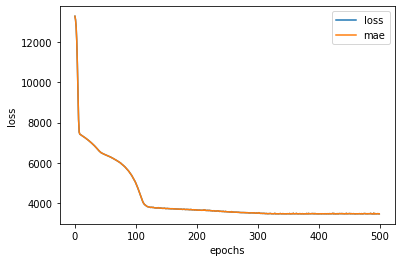

In [10]:
#Plot history (loss curve or a training curve)

pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

**When to determine stopping point** using the early stopping callback it will tell the model to stop training if there is no new improvements observed.

[Earlystop Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

##Pre-processing of Data
Normalisation helps to being the scale of different variable onto the same scale. 

- Normalisation
- Standardisation

Neural network tend to prefer normalisation 

[Resource 1](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data)
[Resource 2](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

Prepartion of Data by borrowing few classes from Scikit-learn

`ct= make_column_transformer((MinMaxScaler(), ['age', 'bmi', 'children']),
                            (OneHotEncoder(handle_unknown='ignore'), ['sex','smoker','region'])
)`

Using this code, it can help to convert the continuous data to be converted into choosen transformer state and catogorical to be onehot encoded. 

Types of Feature Scaling

- Scale `MinMaxScaler` use as default scaler with neural network: Converts all values to between 0 and 1 while preserving distribution

- Standardisation `StandandScaler` Transform a feature to have close to normal distribution: Removes the mean and divides each value by the standard deviation


In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Create a column transformer

ct= make_column_transformer((MinMaxScaler(), ['age', 'bmi', 'children']),
                            (OneHotEncoder(handle_unknown='ignore'), ['sex','smoker','region'])
)

#Create X & y
X= insurance.drop("charges", axis=1)
y=insurance['charges']

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalisayion (MinMaxScaler and OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [15]:
#Looking at data
X_train.loc[0], X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

### Model 4 - Building neural network for insurance model with pre-processed data

In [16]:
#Setting Random Seed
tf.random.set_seed(42)

#import lib
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd


In [25]:
#1. Creating model
insurancemodel4=tf.keras.Sequential([
                                     tf.keras.layers.Dense(100),
                                     tf.keras.layers.Dense(10),
                                     tf.keras.layers.Dense(1)
])

#2. Compile Model 
insurancemodel4.compile(loss= tf.keras.losses.mae, 
                        optimizer= tf.keras.optimizers.Adam(), 
                        metrics=['mae'])

#3. Fit the model
insurancemodel4.fit(X_train_normal,y_train, epochs =100, verbose=0)

#4. Evaluate the model
insurancemodel4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3436.4077 - mae: 3436.4077


[3436.40771484375, 3436.40771484375]

In [ ]:
#4. Evaluate the model
insurancemodel4.evaluate(X_test_normal,y_test)

## Exercise Models

- Model 5 - 4 Dense Layers, 100 epochs
- Model 6 - Increasing units in each layer
- Model 7 - Adjusting Adam (lr= )
- Model 8 - Increase epochs to 300

Importing Boston Pricing Dataset to model.


### Model 5 - 4 Dense Layers, 100 epochs

In [ ]:
#1. Creating model
insurancemodel5=tf.keras.Sequential([
                                     tf.keras.layers.Dense(100),
                                      tf.keras.layers.Dense(100),
                                     tf.keras.layers.Dense(10),
                                     tf.keras.layers.Dense(1)
])

#2. Compile Model 
insurancemodel5.compile(loss= tf.keras.losses.mae, 
                        optimizer= tf.keras.optimizers.Adam(), 
                        metrics=['mae'])

#3. Fit the model
insurancemodel5.fit(X_train_normal,y_train, epochs =100, verbose=0)



In [ ]:
#4. Evaluate the model
insurancemodel5.evaluate(X_test_normal,y_test)

### Model 6 -  Increasing units in each layer

In [61]:
#1. Creating model
insurancemodel6=tf.keras.Sequential([
                                     tf.keras.layers.Dense(300),
                                      tf.keras.layers.Dense(200),
                                     tf.keras.layers.Dense(100),
                                     tf.keras.layers.Dense(1)
])

#2. Compile Model 
insurancemodel6.compile(loss= tf.keras.losses.mae, 
                        optimizer= tf.keras.optimizers.Adam(), 
                        metrics=['mae'])

#3. Fit the model
insurancemodel6.fit(X_train_normal,y_train, epochs =100, verbose=0)


In [62]:
#4. Evaluate the model
insurancemodel6.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3162.8628 - mae: 3162.8628


[3162.86279296875, 3162.86279296875]

### Model 7 - Adjusting Adam (lr= )

In [53]:
#1. Creating model
insurancemodel7=tf.keras.Sequential([
                                     tf.keras.layers.Dense(100),
                                      tf.keras.layers.Dense(100),
                                     tf.keras.layers.Dense(10),
                                     tf.keras.layers.Dense(1)
])

#2. Compile Model 
insurancemodel7.compile(loss= tf.keras.losses.mae, 
                        optimizer= tf.keras.optimizers.Adam(lr=0.001), 
                        metrics=['mae'])

#3. Fit the model
insurancemodel7.fit(X_train_normal,y_train, epochs =100, verbose=0)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [54]:
#4. Evaluate the model
insurancemodel7.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3161.1931 - mae: 3161.1931


[3161.193115234375, 3161.193115234375]

###Model 8 - Increase epochs to 300

In [40]:
#1. Creating model
insurancemodel8=tf.keras.Sequential([
                                     tf.keras.layers.Dense(100),
                                      tf.keras.layers.Dense(100),
                                     tf.keras.layers.Dense(10),
                                     tf.keras.layers.Dense(1)
])

#2. Compile Model 
insurancemodel8.compile(loss= tf.keras.losses.mae, 
                        optimizer= tf.keras.optimizers.Adam(), 
                        metrics=['mae'])

#3. Fit the model
history= insurancemodel8.fit(X_train_normal,y_train, epochs =200, verbose=0)


In [26]:
#Creating Function to plot for Loss Chart
def plot_loss(history):
  pd.DataFrame(history.history).plot()
  plt.xlabel('epochs')
  plt.ylabel('loss');

9/9 [==============================] - 0s 2ms/step - loss: 3176.7710 - mae: 3176.7710


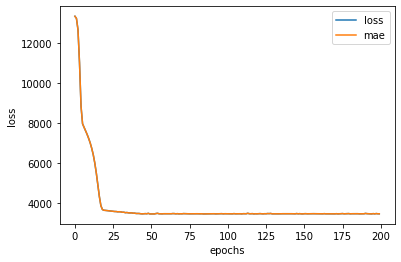

In [41]:
#Evaluating Model and Loss
insurancemodel8.evaluate(X_test_normal,y_test)
plot_loss(history)




Conclusion for each model

- Model 6: 
- Model 7: Improving the learning rate from 0.001 to 0.01 did not improve 
- Model 8: Increasing the number of epochs beyond 200 shows no improvements.

## Test model: Housing Dataset

In [170]:
#Setting Random Seed
tf.random.set_seed(42)

#import lib
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd



In [171]:
#Loading Dataset
housing = tf.keras.datasets.boston_housing.load_data()

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)


In [172]:
#Pre-Processing Data by Nomalisation
X_train = pd.DataFrame(X_train)
X_train.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
X_test = pd.DataFrame(X_test)
X_test.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

X_train.head(), X_test.head()


(      CRIM    ZN  INDUS  CHAS    NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
 0  1.23247   0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  396.90  18.72
 1  0.02177  82.5   2.03   0.0  0.415  ...   2.0  348.0     14.7  395.38   3.11
 2  4.89822   0.0  18.10   0.0  0.631  ...  24.0  666.0     20.2  375.52   3.26
 3  0.03961   0.0   5.19   0.0  0.515  ...   5.0  224.0     20.2  396.90   8.01
 4  3.69311   0.0  18.10   0.0  0.713  ...  24.0  666.0     20.2  391.43  14.65
 
 [5 rows x 13 columns],
        CRIM   ZN  INDUS  CHAS    NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
 0  18.08460  0.0  18.10   0.0  0.679  ...  24.0  666.0     20.2   27.25  29.05
 1   0.12329  0.0  10.01   0.0  0.547  ...   6.0  432.0     17.8  394.95  16.21
 2   0.05497  0.0   5.19   0.0  0.515  ...   5.0  224.0     20.2  396.90   9.74
 3   1.27346  0.0  19.58   1.0  0.605  ...   5.0  403.0     14.7  338.92   5.50
 4   0.07151  0.0   4.49   0.0  0.449  ...   3.0  247.0     18.5  395.15   8.44
 
 [5 rows x 1

In [177]:
#1. Creating model
housingmodel1=tf.keras.Sequential([
                                   tf.keras.layers.Dense(100),
                                   
                                   tf.keras.layers.Dense(1)
])

#2. Compile Model 
housingmodel1.compile(loss= tf.keras.losses.mae, 
                        optimizer= tf.keras.optimizers.Adam(), 
                        metrics=['mae'])

#3. Fit the model
history= housingmodel1.fit(X_train_normal,y_train, epochs =100, verbose=0)

In [178]:
# Evaluate
housingmodel1.evaluate(X_test_normal,y_test)

4/4 [==============================] - 0s 46ms/step - loss: 3.2424 - mae: 3.2424


[3.242365837097168, 3.242365837097168]

### Housing Model 2
Increasing number dense layer

2 to 3 - mae=
3 to 4 - mae=
4 to 5 - mae=

In [180]:
#1. Creating model 2
housingmodel2=tf.keras.Sequential([
                                   tf.keras.layers.Dense(100),
                                   tf.keras.layers.Dense(100),
                                   tf.keras.layers.Dense(1)
])

#2. Compile Model 2
housingmodel2.compile(loss= tf.keras.losses.mae, 
                        optimizer= tf.keras.optimizers.Adam(), 
                        metrics=['mae'])

#3. Fit the model 2
history= housingmodel2.fit(X_train_normal,y_train, epochs =100, verbose=0)
######

#1. Creating model 3
housingmodel3=tf.keras.Sequential([
                                   tf.keras.layers.Dense(100),
                                   tf.keras.layers.Dense(100),
                                   tf.keras.layers.Dense(100),
                                   tf.keras.layers.Dense(1)
])

#2. Compile model 3
housingmodel3.compile(loss= tf.keras.losses.mae, 
                        optimizer= tf.keras.optimizers.Adam(), 
                        metrics=['mae'])

#3. Fit the model 3
history= housingmodel3.fit(X_train_normal,y_train, epochs =100, verbose=0)

######

housingmodel4=tf.keras.Sequential([
                                   tf.keras.layers.Dense(100),
                                   tf.keras.layers.Dense(100),
                                   tf.keras.layers.Dense(100),
                                   tf.keras.layers.Dense(100),
                                   tf.keras.layers.Dense(1)
])

#2. Compile model 4
housingmodel4.compile(loss= tf.keras.losses.mae, 
                        optimizer= tf.keras.optimizers.Adam(), 
                        metrics=['mae'])

#3. Fit the model 4
history= housingmodel4.fit(X_train_normal,y_train, epochs =100, verbose=0)

######

housingmodel5=tf.keras.Sequential([
                                   tf.keras.layers.Dense(100),
                                   tf.keras.layers.Dense(100),
                                   tf.keras.layers.Dense(100),
                                   tf.keras.layers.Dense(100),
                                   tf.keras.layers.Dense(100),
                                   tf.keras.layers.Dense(1)
])

#2. Compile model 5
housingmodel5.compile(loss= tf.keras.losses.mae, 
                        optimizer= tf.keras.optimizers.Adam(), 
                        metrics=['mae'])

#3. Fit the model 5
history= housingmodel5.fit(X_train_normal,y_train, epochs =100, verbose=0)


In [181]:
housingmodel1.evaluate(X_test_normal,y_test), housingmodel2.evaluate(X_test_normal,y_test), housingmodel3.evaluate(X_test_normal,y_test), housingmodel4.evaluate(X_test_normal,y_test), housingmodel5.evaluate(X_test_normal,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 3.0987 - mae: 3.0987


([3.242365837097168, 3.242365837097168],
 [3.1581153869628906, 3.1581153869628906],
 [3.109703540802002, 3.109703540802002],
 [3.121987819671631, 3.121987819671631],
 [3.0987493991851807, 3.0987493991851807])

Adjusting the number of neurons

- Model 6 - 10,10,100
- Model 7 - 10,100,100
- Model 8 - 100,10,10
- Model 9 - 100,100,10
- Model 10 - 10,10,10

In [183]:
#1. Creating model 6
housingmodel6=tf.keras.Sequential([
                                   tf.keras.layers.Dense(10),
                                   tf.keras.layers.Dense(10),
                                   tf.keras.layers.Dense(100),
                                   tf.keras.layers.Dense(1)
])

#2. Compile model 6
housingmodel6.compile(loss= tf.keras.losses.mae, 
                        optimizer= tf.keras.optimizers.Adam(), 
                        metrics=['mae'])

#3. Fit the model 6
history= housingmodel6.fit(X_train_normal,y_train, epochs =100, verbose=0)

#######

#1. Creating model 7
housingmodel7=tf.keras.Sequential([
                                   tf.keras.layers.Dense(10),
                                   tf.keras.layers.Dense(100),
                                   tf.keras.layers.Dense(100),
                                   tf.keras.layers.Dense(1)
])

#2. Compile model 7
housingmodel7.compile(loss= tf.keras.losses.mae, 
                        optimizer= tf.keras.optimizers.Adam(), 
                        metrics=['mae'])

#3. Fit the model 7
history= housingmodel7.fit(X_train_normal,y_train, epochs =100, verbose=0)

#######

#1. Creating model 8
housingmodel8=tf.keras.Sequential([
                                   tf.keras.layers.Dense(100),
                                   tf.keras.layers.Dense(10),
                                   tf.keras.layers.Dense(10),
                                   tf.keras.layers.Dense(1)
])

#2. Compile model 8
housingmodel8.compile(loss= tf.keras.losses.mae, 
                        optimizer= tf.keras.optimizers.Adam(), 
                        metrics=['mae'])

#3. Fit the model 8
history= housingmodel8.fit(X_train_normal,y_train, epochs =100, verbose=0)

#######

#1. Creating model 9
housingmodel9=tf.keras.Sequential([
                                   tf.keras.layers.Dense(100),
                                   tf.keras.layers.Dense(100),
                                   tf.keras.layers.Dense(10),
                                   tf.keras.layers.Dense(1)
])

#2. Compile model 9
housingmodel9.compile(loss= tf.keras.losses.mae, 
                        optimizer= tf.keras.optimizers.Adam(), 
                        metrics=['mae'])

#3. Fit the model 9
history= housingmodel9.fit(X_train_normal,y_train, epochs =100, verbose=0)

#######

#1. Creating model 10
housingmodel10=tf.keras.Sequential([
                                   tf.keras.layers.Dense(10),
                                   tf.keras.layers.Dense(10),
                                   tf.keras.layers.Dense(10),
                                   tf.keras.layers.Dense(1)
])

#2. Compile model 10
housingmodel10.compile(loss= tf.keras.losses.mae, 
                        optimizer= tf.keras.optimizers.Adam(), 
                        metrics=['mae'])

#3. Fit the model 10
history= housingmodel10.fit(X_train_normal,y_train, epochs =100, verbose=0)

#######

In [184]:
housingmodel6.evaluate(X_test_normal,y_test), housingmodel7.evaluate(X_test_normal,y_test), housingmodel8.evaluate(X_test_normal,y_test), housingmodel9.evaluate(X_test_normal,y_test), housingmodel10.evaluate(X_test_normal,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.2483 - mae: 3.2483


([3.138126850128174, 3.138126850128174],
 [3.270878314971924, 3.270878314971924],
 [3.1136858463287354, 3.1136858463287354],
 [3.221048593521118, 3.221048593521118],
 [3.248342514038086, 3.248342514038086])